In [1]:
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt

number_of_companies_with_industries = 639
column_name = 'Aggregated Industry'
industry_comparison = pd.read_csv('../data/tmp-industry-comparison.csv', index_col=0)

In [2]:
def show_closed_deals(closed_deals):
    if (closed_deals < 23):
        return str(closed_deals)
    return str(closed_deals) + " deals closed"

In [3]:
def show_row_summary(total, efficency):
    if (total > 19):
        return str(total)+" deals ("+str(round(efficency, 1))+"% closed)"
    return str(total)+" deals"

In [10]:
def plot_comparison(industry_comparison, column_name, number_of_companies, isAlreadyOrdered=False):
    df = industry_comparison.copy()
    df['Total deals'] = df['Closed deals'] + df['Lost deals']
    df['Efficency'] = df['Closed deals'] / (df['Closed deals'] + df['Lost deals']) * 100
    if (not isAlreadyOrdered):
        df = df.sort_values(by=['Efficency'], ascending=True).reset_index()

    style.use('ggplot')

    dark_grey_color = '#29323C'

    graph = df.plot(x=column_name, y=['Closed deals', 'Lost deals'], kind='barh', stacked=True, figsize=(26,20), fontsize=16, color=['#27A8E0', '#626E7A'], legend=False)

    graph.set_title("Deals per "+column_name+" (based on "+str(number_of_companies)+" / 802 companies)", fontsize=22, color=dark_grey_color, pad=50)

    graph.patch.set_color('#EEF2F5')

    graph.tick_params(colors=dark_grey_color)

    graph.set_xlabel("Number of deals", fontsize=16, color=dark_grey_color)
    graph.set_ylabel(None)
    graph.xaxis.grid(True)
    graph.yaxis.grid(False)

    graph.set_xticks([25,50,75,100,125,150,175,200,225,250,275,300])

    height = 1
    for idx, row in df.iterrows():
        total = df.at[idx, 'Total deals']
        efficency = df.at[idx, 'Efficency']
        lost_deals = df.at[idx, 'Lost deals']
        closed_deals = df.at[idx, 'Closed deals']
        y = idx * height - 0.08
        graph.text(total + 1, y, show_row_summary(total, efficency), fontsize=14, color=dark_grey_color)
        graph.text(closed_deals + 1, y, str(lost_deals), fontsize=14, color=dark_grey_color)
        graph.text(1, y, show_closed_deals(closed_deals), fontsize=14, color=dark_grey_color)


plot_comparison(industry_comparison, column_name, number_of_companies_with_industries)

KeyError: 'LinkedIn size'

In [8]:
number_of_companies_with_size = 584
column_name = 'LinkedIn size'

In [9]:
size_comparison = pd.read_csv('../data/tmp-linkedin-size-comparison.csv', index_col=0)
size_comparison = size_comparison.sort_index().reset_index(drop=True)
df = size_comparison
size_comparison = pd.concat([df.ix[0:3], df.ix[5:], df.ix[[4]]]).reset_index()
size_comparison.head()

,index,LinkedIn size,Closed deals,Lost deals
0,0,0-1,6,9
1,1,2-10,44,140
2,2,11-50,82,170
3,3,51-200,57,104
4,5,201-500,46,69


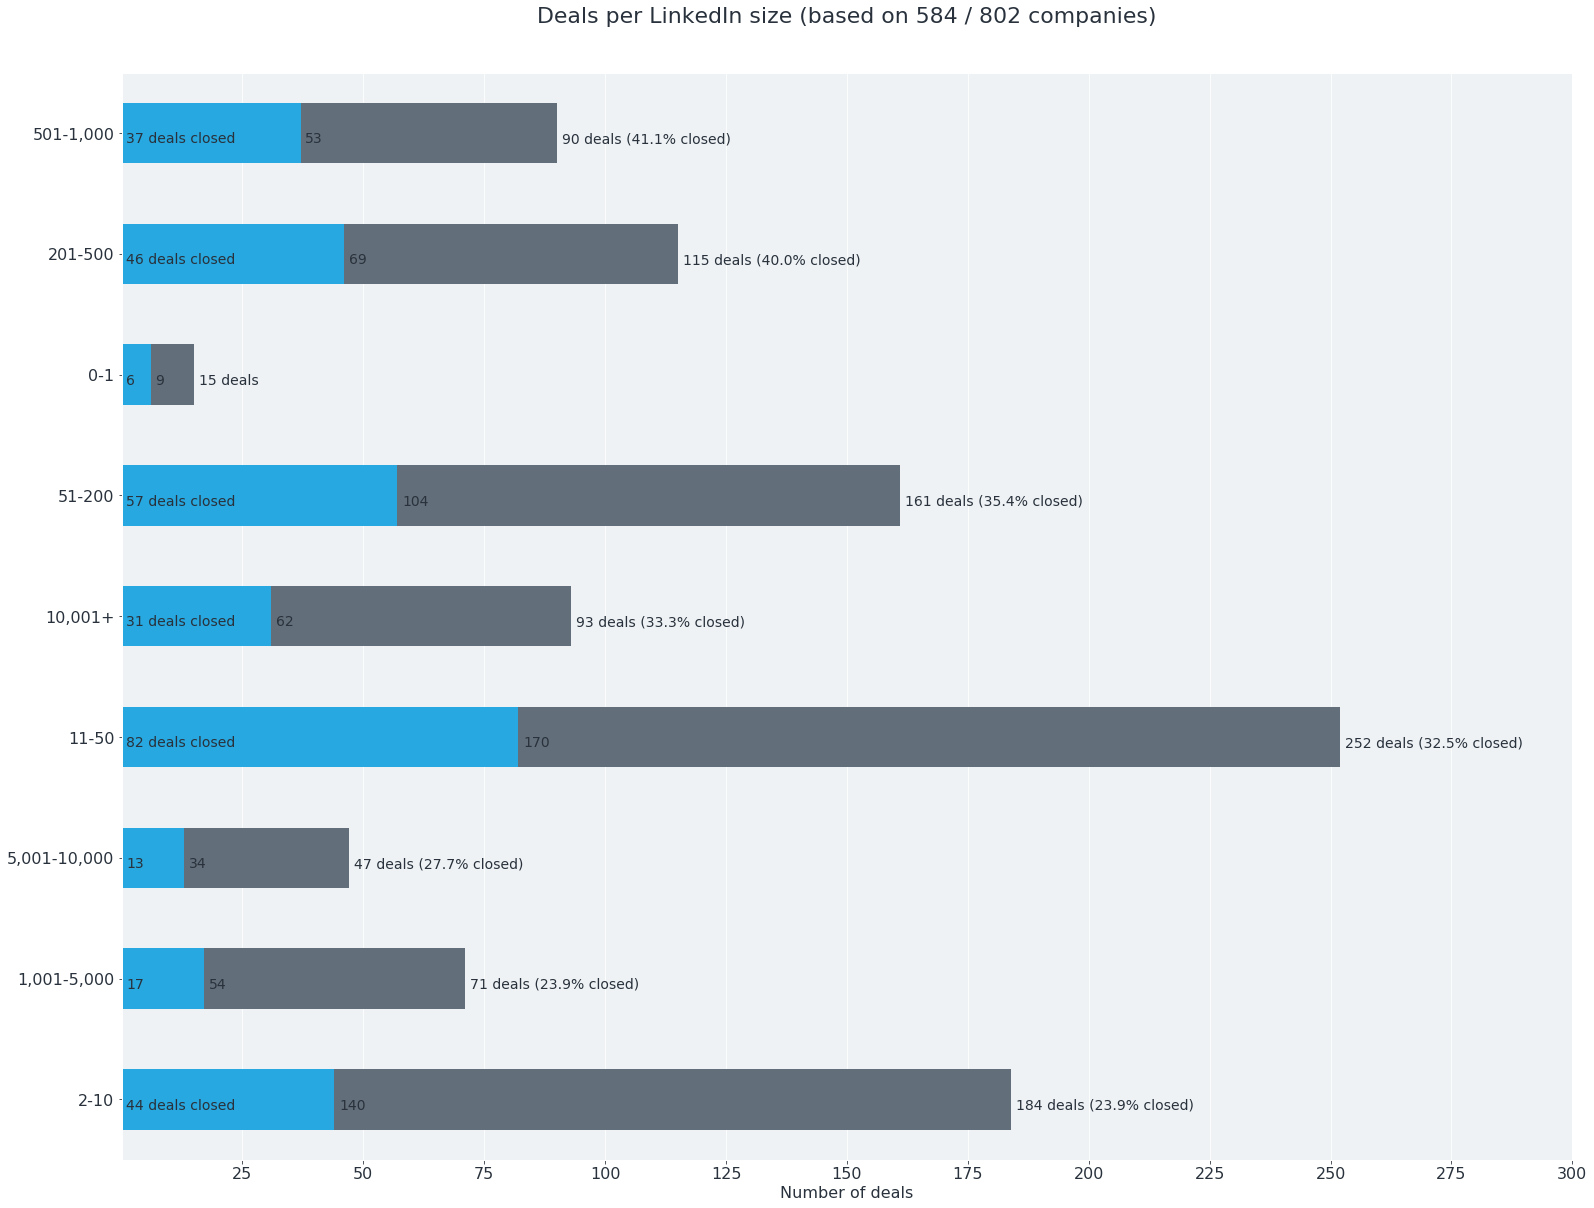

In [15]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Lato'

plot_comparison(size_comparison, column_name, number_of_companies_with_size, False)

In [13]:
from matplotlib.font_manager import findfont, FontProperties
font = findfont(FontProperties(family=['sans-serif']))
font

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


'/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'